In [37]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")

find_and_append_module_path()
os.getcwd()


New current directory: c:\Users\Robert\Documents\Projekte\dev\statsfaction


'c:\\Users\\Robert\\Documents\\Projekte\\dev\\statsfaction'

In [38]:
from src.sport_analytics.model.predict import predict_and_explain_players, analyze_individual_ID


# Import your group to analyze

In [39]:
sql_prospect = f"""
SELECT min(Age) as potential_age,* FROM  fifa WHERE Potential>84 AND FIFA = 2024 and Age < 23 and potential > 83 and overall <84
GROUP BY ID
order by potential DESC;
"""

import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(DATABASE_PATH)

df_prospect = pd.read_sql_query(sql_prospect, conn)

conn.close()

df_prospect.head()

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,FIFA,Composure,Defensive awareness
0,19.0,263578,Balde,19.0,https://cdn.sofifa.net/players/263/578/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,81.0,89.0,FC Barcelona,...,80.0,79.0,5.0,8.0,7.0,10.0,13.0,2024,64.0,72.0
1,20.0,259399,R. Højlund,20.0,https://cdn.sofifa.net/players/259/399/24_60.png,Denmark,https://cdn.sofifa.net/flags/dk.png,76.0,89.0,Manchester United,...,24.0,15.0,12.0,8.0,9.0,14.0,7.0,2024,72.0,27.0
2,21.0,258729,Gabri Veiga,21.0,https://cdn.sofifa.net/players/258/729/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,78.0,89.0,Celta de Vigo,...,73.0,60.0,13.0,14.0,13.0,6.0,9.0,2024,68.0,41.0
3,20.0,248243,E. Camavinga,20.0,https://cdn.sofifa.net/players/248/243/24_60.png,France,https://cdn.sofifa.net/flags/fr.png,82.0,89.0,Real Madrid,...,80.0,79.0,12.0,6.0,8.0,12.0,12.0,2024,82.0,75.0
4,20.0,245367,X. Simons,20.0,https://cdn.sofifa.net/players/245/367/24_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,79.0,89.0,RB Leipzig,...,62.0,56.0,9.0,11.0,5.0,8.0,10.0,2024,78.0,60.0


In [40]:
pd.Series(df_prospect.Overall/(df_prospect.Age**2)).describe()

count    93.000000
mean      0.192013
std       0.023734
min       0.152893
25%       0.170068
50%       0.192500
75%       0.207756
max       0.256055
dtype: float64

## Choose a from a Set of trained models

In [41]:
import pickle

with open("./data/sport_analytics/model/Offense_trained_models.pkl", "rb") as file:
    loaded_object = pickle.load(file)

In [42]:
[i for i in loaded_object]

['Logistic Regression',
 'Decision Tree Classifier',
 'Random Forest Classifier',
 'Support Vector Classifier',
 'XGBoost Classifier',
 'LightGBM Classifier']

In [43]:
chosen_object = loaded_object['Random Forest Classifier']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']

print(chosen_object['Classification Report'])
print(chosen_object['AUC'])

              precision    recall  f1-score   support

       False       0.87      0.76      0.81        51
        True       0.14      0.25      0.18         8

    accuracy                           0.69        59
   macro avg       0.50      0.51      0.50        59
weighted avg       0.77      0.69      0.73        59

0.7401960784313726


# Predict entire Dataset

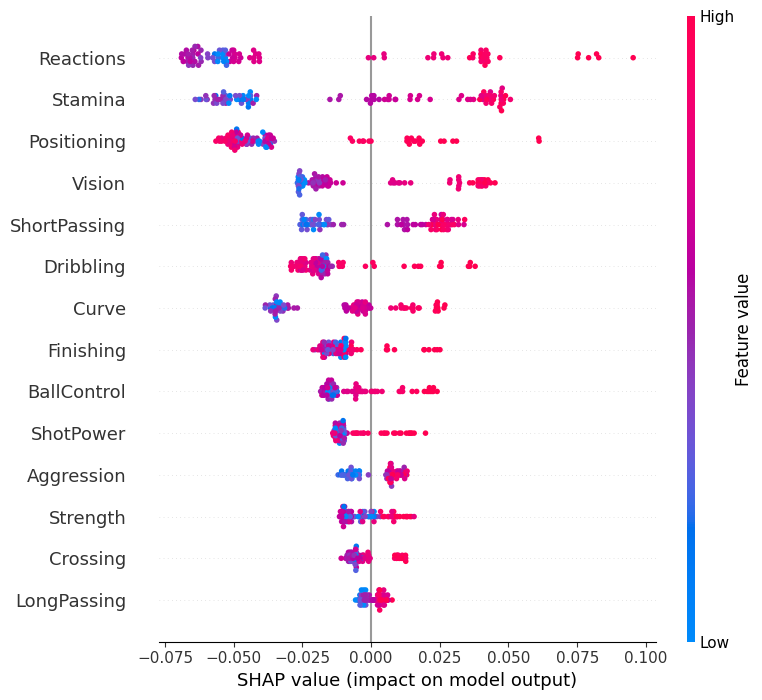

,,,Crossing,Finishing,ShortPassing,Dribbling,Curve,LongPassing,BallControl,Reactions,ShotPower,Stamina,Strength,Aggression,Positioning,Vision,summe_shap,prediction
ID,Name,FIFA,,,,,,,,,,,,,,,,
236772,D. Szoboszlai,2024,1.872,0.464,1.001,2.019,1.657,1.989,2.506,2.021,2.699,0.682,-0.669,-0.849,1.955,1.552,18.899,0.775864
256903,Gonçalo Ramos,2024,-0.149,3.409,-0.007,-0.386,0.251,-0.178,0.233,2.438,3.189,1.316,1.037,1.177,3.157,-0.705,14.782,0.721327
252145,Nuno Mendes,2024,1.589,-1.078,0.687,-0.696,1.018,1.099,0.730,2.026,2.506,1.283,-0.190,0.538,1.487,0.285,11.284,0.661620
245367,X. Simons,2024,1.980,0.341,0.995,1.879,1.346,1.084,2.301,1.239,-0.541,1.294,-0.689,0.472,-0.933,1.584,12.352,0.649791
246618,A. Hložek,2024,0.191,0.615,0.638,-0.670,0.227,0.928,0.282,0.945,2.472,1.304,0.812,0.603,1.485,1.347,11.179,0.631315
245155,M. Kudus,2024,-0.307,-0.002,0.808,3.145,0.189,1.100,2.389,-0.544,1.529,1.374,0.284,0.388,1.647,1.079,13.079,0.626455
251852,K. Adeyemi,2024,-0.068,3.107,0.225,0.934,0.142,-0.382,0.382,1.336,0.404,1.136,-0.776,0.590,1.541,0.311,8.882,0.621542
245541,G. Reyna,2024,0.076,0.267,0.946,3.256,1.794,-0.420,0.641,1.237,1.278,0.385,-0.077,0.405,-0.897,1.507,10.398,0.620694
245371,T. Almada,2024,-0.109,0.321,0.931,0.765,1.676,1.170,1.897,-0.403,-0.559,1.202,0.525,0.431,1.647,1.563,11.057,0.617072


In [47]:
preds = predict_and_explain_players(df_prospect,attributes=attributes,model=model,scaler=scaler)
preds.head(50)

# Analyze individual Players

pred 0.4284548269707217
[(240833, 'Y. Moukoko', 2024)]


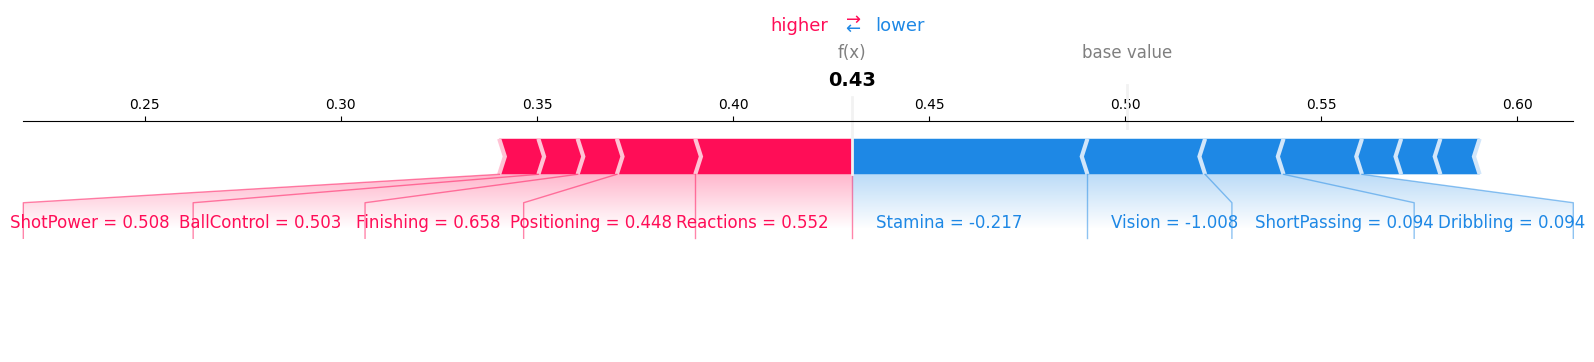

Crossing        47.0
Finishing       79.0
ShortPassing    71.0
Dribbling       79.0
Curve           68.0
LongPassing     48.0
BallControl     81.0
Reactions       77.0
ShotPower       78.0
Stamina         68.0
Strength        68.0
Aggression      52.0
Positioning     78.0
Vision          59.0
Name: (240833, Y. Moukoko, 2024), dtype: object
pred 0.628834874656662
[(251852, 'K. Adeyemi', 2024)]


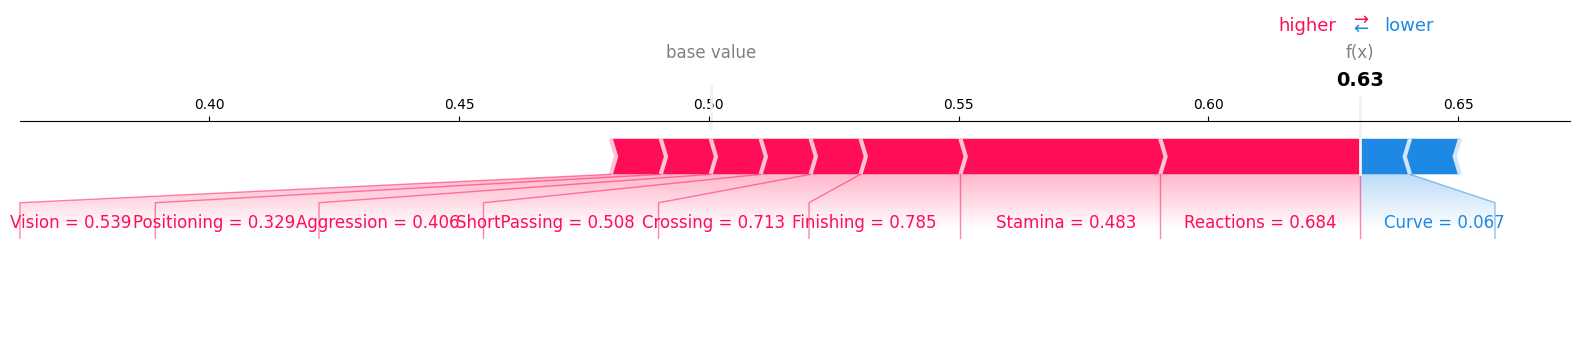

Crossing        71.0
Finishing       80.0
ShortPassing    74.0
Dribbling       82.0
Curve           67.0
LongPassing     64.0
BallControl     79.0
Reactions       78.0
ShotPower       76.0
Stamina         75.0
Strength        66.0
Aggression      59.0
Positioning     77.0
Vision          72.0
Name: (251852, K. Adeyemi, 2024), dtype: object
pred 0.46534553394788786
[(259399, 'R. Højlund', 2024)]


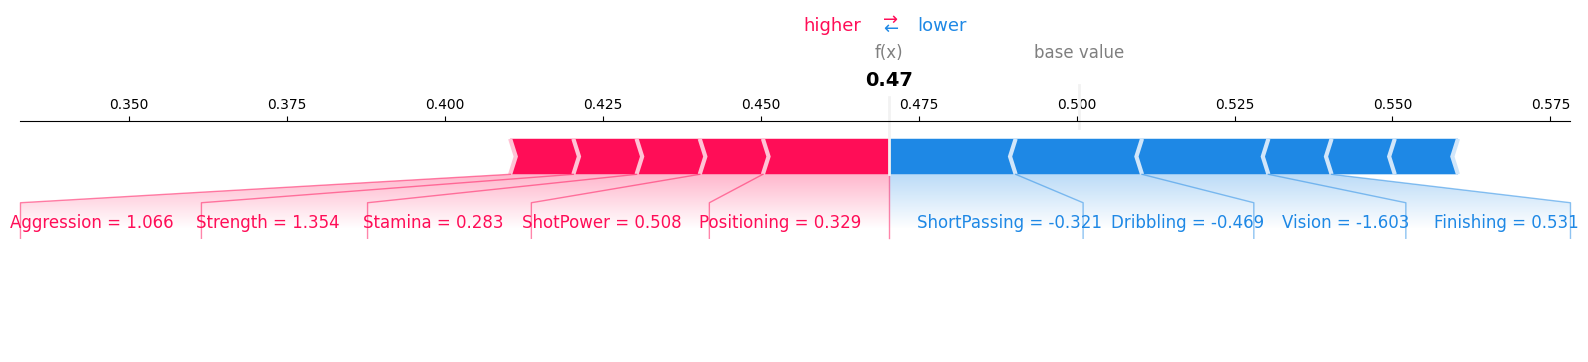

Crossing        38.0
Finishing       78.0
ShortPassing    68.0
Dribbling       75.0
Curve           58.0
LongPassing     49.0
BallControl     76.0
Reactions       75.0
ShotPower       78.0
Stamina         73.0
Strength        84.0
Aggression      69.0
Positioning     77.0
Vision          54.0
Name: (259399, R. Højlund, 2024), dtype: object
pred 0.7213269811930785
[(256903, 'Gonçalo Ramos', 2024)]


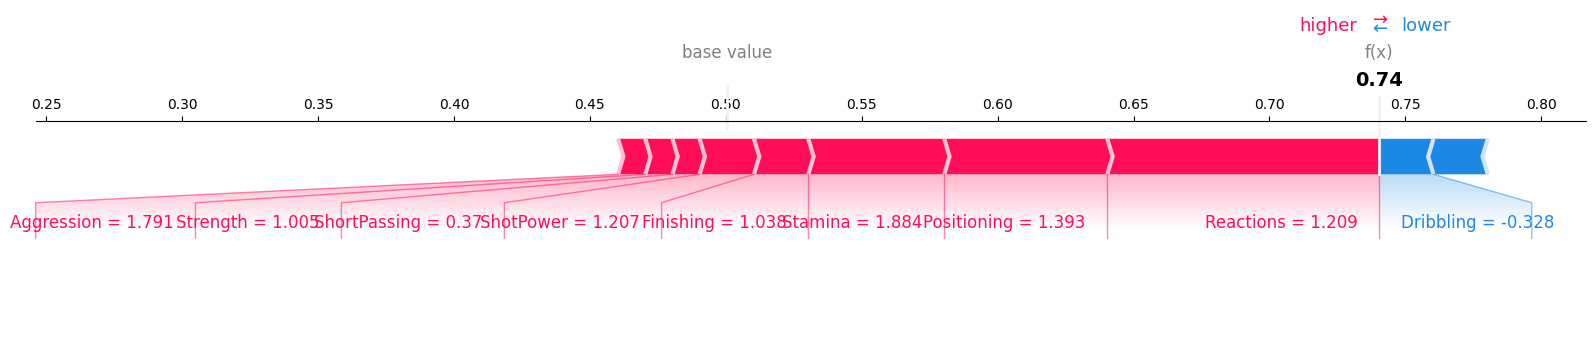

Crossing        60.0
Finishing       82.0
ShortPassing    73.0
Dribbling       76.0
Curve           64.0
LongPassing     65.0
BallControl     78.0
Reactions       82.0
ShotPower       83.0
Stamina         89.0
Strength        79.0
Aggression      80.0
Positioning     86.0
Vision          63.0
Name: (256903, Gonçalo Ramos, 2024), dtype: object
pred 0.44157945119102254
[(253004, 'Ansu Fati', 2024)]


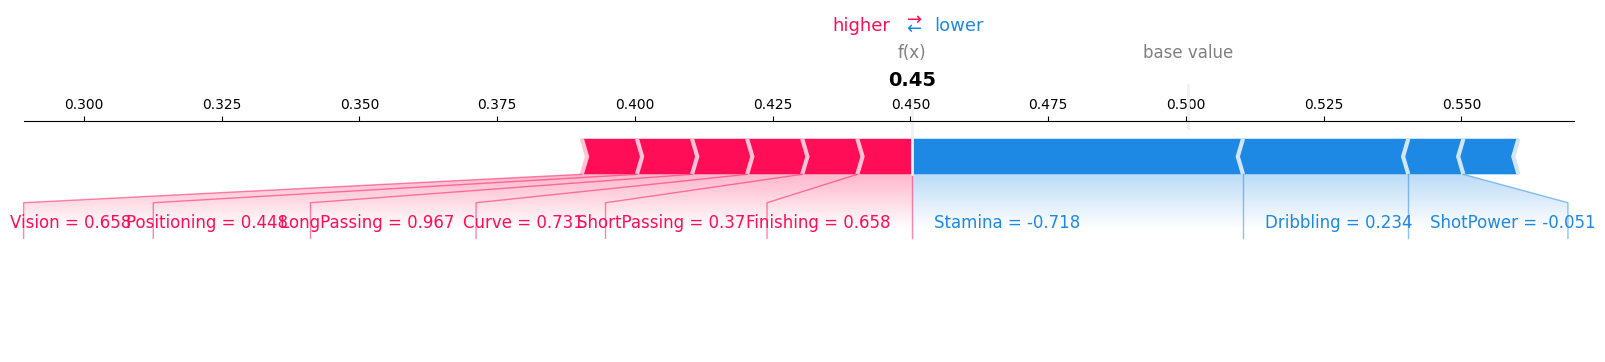

Crossing        69.0
Finishing       79.0
ShortPassing    73.0
Dribbling       80.0
Curve           75.0
LongPassing     69.0
BallControl     79.0
Reactions       75.0
ShotPower       74.0
Stamina         63.0
Strength        49.0
Aggression      48.0
Positioning     78.0
Vision          73.0
Name: (253004, Ansu Fati, 2024), dtype: object
pred 0.5030728760958715
[(264309, 'A. Güler', 2024)]


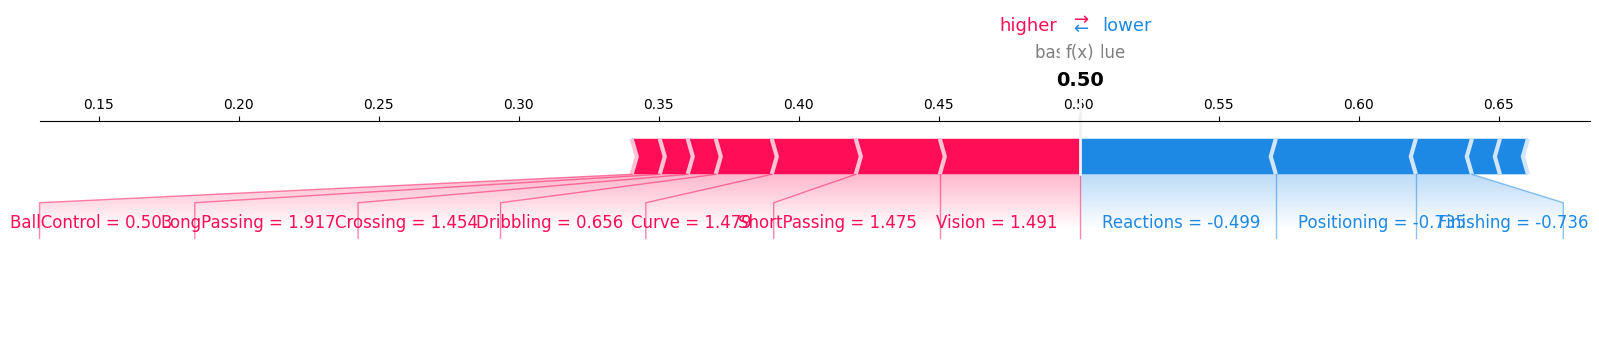

Crossing        80.0
Finishing       68.0
ShortPassing    81.0
Dribbling       83.0
Curve           84.0
LongPassing     79.0
BallControl     81.0
Reactions       69.0
ShotPower       72.0
Stamina         70.0
Strength        43.0
Aggression      42.0
Positioning     68.0
Vision          80.0
Name: (264309, A. Güler, 2024), dtype: object
pred 0.4940809736752625
[(251517, 'J. Gvardiol', 2024)]


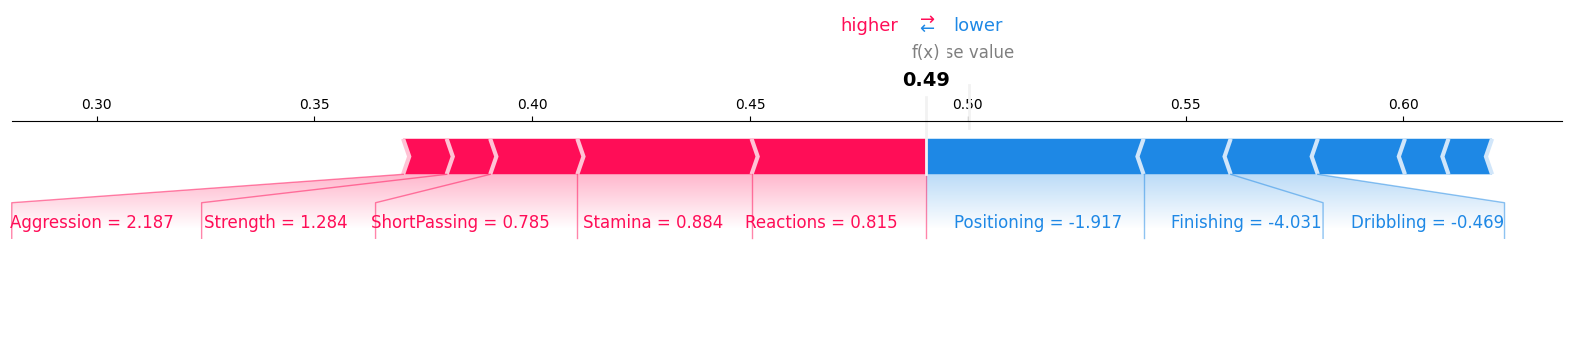

Crossing        61.0
Finishing       42.0
ShortPassing    76.0
Dribbling       75.0
Curve           59.0
LongPassing     74.0
BallControl     76.0
Reactions       79.0
ShotPower       76.0
Stamina         79.0
Strength        83.0
Aggression      86.0
Positioning     58.0
Vision          65.0
Name: (251517, J. Gvardiol, 2024), dtype: object


In [51]:
for ID in [240833,251852,259399,256903,253004,264309,251517]:
    analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler)